In [1]:
import matplotlib.pyplot as plt #plotting
import numpy as np
import os #to access directory
from tqdm import tqdm #counting files

import seaborn as sns #visual beautification
import cv2
import io #input/ouput from local
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #shuffles matrics randomly with continuation of same pattern
from tensorflow.keras.preprocessing.image import ImageDataGenerator #augmentation, annotation
from tensorflow.keras.applications import EfficientNetB7 #B0-B7

#EarlyStopping: to avoid overfitting
#ReduceLROnplateau: Reduce Learning Rate based on weight
#TensorBoard: Visualization toolkit of tensorflow
#ModelCheckpoint: save the model or weight at every epoch for improve performance and avoid repeat

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import to_categorical #encoding

#result checking
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from warnings import filterwarnings #ignore deprecation
from PIL import Image #pillow for image open, rotate and display

import ipywidgets as widgets  #for button
from IPython.display import display, clear_output 

To see all files one by one and findout unnecessary/hidden/corrupted file, name mismatch

In [2]:
#Check the hidden files
# for dirname, _, filenames in os.walk("../input/parkinsonproject/Parkinson/"):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

#OR,
#AD = []
#for i in os.listdir('../input/parkinsonproject/Parkinson/trainDatasets/AD/'):
#     if i ==".DS_store":
#        continue

# Drop the unexpected hidden file
# AD = []
# for i in os.listdir('../input/parkinsonproject/Parkinson/trainDatasets/AD/'):
#   AD.append()

# AD.drop("")

# OR,
# ".DS_store" in AD
#  AD.drop(".DS_store")

In [3]:
#labels based on classwise folder name in directory
labels=["Final AD JPEG", "Final CN JPEG", "Final EMCI JPEG", "Final LMCI JPEG", "Final MCI JPEG"]

# Prepare train test Data Together

In [4]:
X_train  =[] # Training Datasets
y_train = [] # Training Labels

image_size = 162

for i in labels:
    folderpath= os.path.join("Alzheimers-ADNI", "train", i)  #tagging labels by i
    for j in tqdm(os.listdir(folderpath)): #tqdm counting
        image  = cv2.imread(os.path.join(folderpath, j)) #image to array
        image = cv2.resize(image, (image_size, image_size))
        
        X_train.append(image)
        y_train.append(i)
        
        
for i in labels:
    folderpath= os.path.join("Alzheimers-ADNI", "test", i)
    for j in tqdm(os.listdir(folderpath)):
        image  = cv2.imread(os.path.join(folderpath, j))
        image = cv2.resize(image, (image_size, image_size))
        
        X_train.append(image) #convert it to numpy array to make it workable
        y_train.append(i)
        
        
X_train = np.array(X_train)
y_train = np.array(y_train)


100%|██████████| 35/35 [00:00<00:00, 1458.31it/s]


In [5]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)

X_train Shape: (1296, 162, 162, 3)
y_train Shape: (1296,)


# Count unique value for each class

In [6]:
_,y_trainImageInfo= np.unique(y_train, return_counts =True)
print("Final AD JPEG:")
print("counts:", y_trainImageInfo[0])
print("Final CN JPEG:")
print("counts:", y_trainImageInfo[1])
print("Final EMCI JPEG:")
print("counts:", y_trainImageInfo[2])
print("Final LMCI JPEG:")
print("counts:", y_trainImageInfo[3])
print("Final MCI JPEG:")
print("counts:", y_trainImageInfo[4])

Final AD JPEG:
counts: 171
Final CN JPEG:
counts: 580
Final EMCI JPEG:
counts: 240
Final LMCI JPEG:
counts: 72
Final MCI JPEG:
counts: 233


In [7]:
#shuffle based on randomState
X_train, y_train = shuffle(X_train, y_train, random_state=101)

In [8]:
print("Shape of X_train:",'\n',X_train.shape)
print("Shape of y_train:",'\n',y_train.shape)

Shape of X_train: 
 (1296, 162, 162, 3)
Shape of y_train: 
 (1296,)


In [9]:
print(y_train[0])
print(y_train[100])
print(y_train[200])
print(y_train[500])
print(y_train[750])
print(y_train[1000])
print(y_train[1295])

Final EMCI JPEG
Final CN JPEG
Final EMCI JPEG
Final MCI JPEG
Final EMCI JPEG
Final CN JPEG
Final LMCI JPEG


# Train and Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.10, random_state=101)

In [11]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1166, 162, 162, 3)
X_test: (130, 162, 162, 3)
y_train: (1166,)
y_test: (130,)


In [12]:
print("y_train Index 0:", y_train[0])
print("y_test Index 0:", y_test[0])

y_train Index 0: Final EMCI JPEG
y_test Index 0: Final EMCI JPEG


# Categorical/label/one hot encoding

In [13]:
y_train_new=[]
y_test_new=[]

for i in y_train:
    y_train_new.append(labels.index(i)) #indexing value of y_train
y_train = y_train_new
y_train = to_categorical(y_train)

for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = to_categorical(y_test)

In [14]:
print("shape of y_train", y_train.shape)
print("array of y_test", y_test.shape)
print("array of y_train", y_train)

shape of y_train (1166, 5)
array of y_test (130, 5)
array of y_train [[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


# max value in array for respective image class

In [15]:
#maxma value of that array of respective image
print(np.argmax(y_train[0]))
print(np.argmax(y_train[200]))
print(np.argmax(y_train[450]))

2
0
2


In [16]:
efficient = EfficientNetB7(weights ="imagenet", include_top=False, input_shape=(image_size, image_size, 3))

In [17]:
import tensorflow as tf

In [18]:
#pooling can be avg or max
#dropout range 0.3 -0.5 which means 30-50% neurons will be dropped to avoid overfitting
model=efficient.output
model=tf.keras.layers.GlobalMaxPooling2D()(model)
model=tf.keras.layers.Dropout(0.5)(model)
model=tf.keras.layers.Dense(5, activation="softmax")(model)
model=tf.keras.models.Model(inputs=efficient.input, outputs=model)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 162, 162, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 162, 162, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 162, 162, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 162, 162, 3)  0           ['normalization[0][0]']      

 block1c_activation (Activation  (None, 81, 81, 32)  0           ['block1c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_se_reshape (Reshape)   (None, 1, 1, 32)     0           ['block1c_se_squeeze[0][0]']     
                                                                                                  
 block1c_se_reduce (Conv2D)     (None, 1, 1, 8)      264         ['block1c_se_reshape[0][0]']     
                                                                                                  
 block1c_s

 block2a_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block2a_se_reduce[0][0]']      
                                                                                                  
 block2a_se_excite (Multiply)   (None, 41, 41, 192)  0           ['block2a_activation[0][0]',     
                                                                  'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, 41, 41, 48)   9216        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 41, 41, 48)  192         ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_e

 block2c_drop (Dropout)         (None, 41, 41, 48)   0           ['block2c_project_bn[0][0]']     
                                                                                                  
 block2c_add (Add)              (None, 41, 41, 48)   0           ['block2c_drop[0][0]',           
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block2d_expand_conv (Conv2D)   (None, 41, 41, 288)  13824       ['block2c_add[0][0]']            
                                                                                                  
 block2d_expand_bn (BatchNormal  (None, 41, 41, 288)  1152       ['block2d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2d_e

 block2f_expand_conv (Conv2D)   (None, 41, 41, 288)  13824       ['block2e_add[0][0]']            
                                                                                                  
 block2f_expand_bn (BatchNormal  (None, 41, 41, 288)  1152       ['block2f_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2f_expand_activation (Act  (None, 41, 41, 288)  0          ['block2f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2f_dwconv (DepthwiseConv2  (None, 41, 41, 288)  2592       ['block2f_expand_activation[0][0]
 D)                                                              ']                               
          

 block3a_expand_activation (Act  (None, 41, 41, 288)  0          ['block3a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3a_dwconv_pad (ZeroPaddin  (None, 45, 45, 288)  0          ['block3a_expand_activation[0][0]
 g2D)                                                            ']                               
                                                                                                  
 block3a_dwconv (DepthwiseConv2  (None, 21, 21, 288)  7200       ['block3a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block3a_bn (BatchNormalization  (None, 21, 21, 288)  1152       ['block3a_dwconv[0][0]']         
 )        

 )                                                                                                
                                                                                                  
 block3c_activation (Activation  (None, 21, 21, 480)  0          ['block3c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3c_se_squeeze (GlobalAver  (None, 480)         0           ['block3c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3c_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3c_se_squeeze[0][0]']     
                                                                                                  
 block3c_s

 block3e_se_squeeze (GlobalAver  (None, 480)         0           ['block3e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3e_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3e_se_squeeze[0][0]']     
                                                                                                  
 block3e_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3e_se_reshape[0][0]']     
                                                                                                  
 block3e_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3e_se_reduce[0][0]']      
                                                                                                  
 block3e_se_excite (Multiply)   (None, 21, 21, 480)  0           ['block3e_activation[0][0]',     
          

 block3g_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3g_se_reshape[0][0]']     
                                                                                                  
 block3g_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3g_se_reduce[0][0]']      
                                                                                                  
 block3g_se_excite (Multiply)   (None, 21, 21, 480)  0           ['block3g_activation[0][0]',     
                                                                  'block3g_se_expand[0][0]']      
                                                                                                  
 block3g_project_conv (Conv2D)  (None, 21, 21, 80)   38400       ['block3g_se_excite[0][0]']      
                                                                                                  
 block3g_project_bn (BatchNorma  (None, 21, 21, 80)  320         ['block3g_project_conv[0][0]']   
 lization)

 block4b_project_conv (Conv2D)  (None, 11, 11, 160)  153600      ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 11, 11, 160)  640        ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 11, 11, 160)  0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 11, 11, 160)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_e

 block4d_drop (Dropout)         (None, 11, 11, 160)  0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 11, 11, 160)  0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 11, 11, 960)  153600      ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 11, 11, 960)  3840       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4e_e

 block4g_expand_conv (Conv2D)   (None, 11, 11, 960)  153600      ['block4f_add[0][0]']            
                                                                                                  
 block4g_expand_bn (BatchNormal  (None, 11, 11, 960)  3840       ['block4g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4g_expand_activation (Act  (None, 11, 11, 960)  0          ['block4g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4g_dwconv (DepthwiseConv2  (None, 11, 11, 960)  8640       ['block4g_expand_activation[0][0]
 D)                                                              ']                               
          

 block4i_expand_activation (Act  (None, 11, 11, 960)  0          ['block4i_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4i_dwconv (DepthwiseConv2  (None, 11, 11, 960)  8640       ['block4i_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4i_bn (BatchNormalization  (None, 11, 11, 960)  3840       ['block4i_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4i_activation (Activation  (None, 11, 11, 960)  0          ['block4i_bn[0][0]']             
 )        

                                                                                                  
 block5a_bn (BatchNormalization  (None, 11, 11, 960)  3840       ['block5a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5a_activation (Activation  (None, 11, 11, 960)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 960)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_s

 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 11, 11, 1344  0           ['block5c_activation[0][0]',     
                                )                                 'block5c_se_expand[0][0]']      
          

                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5e_se_reduce[0][0]']      
                                                                                                  
 block5e_se_excite (Multiply)   (None, 11, 11, 1344  0           ['block5e_activation[0][0]',     
                                )                                 'block5e_se_expand[0][0]']      
                                                                                                  
 block5e_project_conv (Conv2D)  (None, 11, 11, 224)  301056      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_p

 block5g_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 11, 11, 1344  0           ['block5g_activation[0][0]',     
                                )                                 'block5g_se_expand[0][0]']      
                                                                                                  
 block5g_project_conv (Conv2D)  (None, 11, 11, 224)  301056      ['block5g_se_excite[0][0]']      
                                                                                                  
 block5g_project_bn (BatchNorma  (None, 11, 11, 224)  896        ['block5g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5g_d

                                )                                 'block5i_se_expand[0][0]']      
                                                                                                  
 block5i_project_conv (Conv2D)  (None, 11, 11, 224)  301056      ['block5i_se_excite[0][0]']      
                                                                                                  
 block5i_project_bn (BatchNorma  (None, 11, 11, 224)  896        ['block5i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5i_drop (Dropout)         (None, 11, 11, 224)  0           ['block5i_project_bn[0][0]']     
                                                                                                  
 block5i_add (Add)              (None, 11, 11, 224)  0           ['block5i_drop[0][0]',           
          

                                                                  'block6a_se_expand[0][0]']      
                                                                                                  
 block6a_project_conv (Conv2D)  (None, 6, 6, 384)    516096      ['block6a_se_excite[0][0]']      
                                                                                                  
 block6a_project_bn (BatchNorma  (None, 6, 6, 384)   1536        ['block6a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_expand_conv (Conv2D)   (None, 6, 6, 2304)   884736      ['block6a_project_bn[0][0]']     
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, 6, 6, 2304)  9216        ['block6b_expand_conv[0][0]']    
 ization) 

                                                                  'block6b_add[0][0]']            
                                                                                                  
 block6d_expand_conv (Conv2D)   (None, 6, 6, 2304)   884736      ['block6c_add[0][0]']            
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, 6, 6, 2304)  9216        ['block6d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6d_expand_activation (Act  (None, 6, 6, 2304)  0           ['block6d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6d_d

 ization)                                                                                         
                                                                                                  
 block6f_expand_activation (Act  (None, 6, 6, 2304)  0           ['block6f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6f_dwconv (DepthwiseConv2  (None, 6, 6, 2304)  57600       ['block6f_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6f_bn (BatchNormalization  (None, 6, 6, 2304)  9216        ['block6f_dwconv[0][0]']         
 )                                                                                                
          

 block6h_dwconv (DepthwiseConv2  (None, 6, 6, 2304)  57600       ['block6h_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6h_bn (BatchNormalization  (None, 6, 6, 2304)  9216        ['block6h_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6h_activation (Activation  (None, 6, 6, 2304)  0           ['block6h_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6h_se_squeeze (GlobalAver  (None, 2304)        0           ['block6h_activation[0][0]']     
 agePoolin

                                                                                                  
 block6j_activation (Activation  (None, 6, 6, 2304)  0           ['block6j_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6j_se_squeeze (GlobalAver  (None, 2304)        0           ['block6j_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6j_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6j_se_squeeze[0][0]']     
                                                                                                  
 block6j_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6j_se_reshape[0][0]']     
          

 agePooling2D)                                                                                    
                                                                                                  
 block6l_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6l_se_squeeze[0][0]']     
                                                                                                  
 block6l_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6l_se_reshape[0][0]']     
                                                                                                  
 block6l_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6l_se_reduce[0][0]']      
                                                                                                  
 block6l_se_excite (Multiply)   (None, 6, 6, 2304)   0           ['block6l_activation[0][0]',     
                                                                  'block6l_se_expand[0][0]']      
          

                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block7a_se_reduce[0][0]']      
                                                                                                  
 block7a_se_excite (Multiply)   (None, 6, 6, 2304)   0           ['block7a_activation[0][0]',     
                                                                  'block7a_se_expand[0][0]']      
                                                                                                  
 block7a_project_conv (Conv2D)  (None, 6, 6, 640)    1474560     ['block7a_se_excite[0][0]']      
                                                                                                  
 block7a_project_bn (BatchNorma  (None, 6, 6, 640)   2560        ['block7a_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block7c_drop (Dropout)         (None, 6, 6, 640)    0           ['block7c_project_bn[0][0]']     
                                                                                                  
 block7c_add (Add)              (None, 6, 6, 640)    0           ['block7c_drop[0][0]',           
                                                                  'block7b_add[0][0]']            
                                                                                                  
 block7d_expand_conv (Conv2D)   (None, 6, 6, 3840)   2457600     ['block7c_add[0][0]']            
                                                                                                  
 block7d_expand_bn (BatchNormal  (None, 6, 6, 3840)  15360       ['block7d_expand_conv[0][0]']    
 ization)                                                                                         
          

In [20]:
#loss for categorical value, adam perform best
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics =["accuracy"])

In [21]:
#.h5 = Hierarchical Data Format Ver. 5 file, verbose =1, to see execution
tensorboard= TensorBoard(log_dir="logs")
checkpoint= ModelCheckpoint("efficient.h5",
                           monitor="val_accuracy", verbose=1,
                           mode="auto", save_best_only=True)
#monitor: quantity to be monitored.     
#factor: factor by which the learning rate will be reduced. 
#patience: number of epochs with no improvement after which learning rate will be reduced.     
#verbose: int. 0: quiet, 1: update messages.
#min_delta: early stopping of epochs
reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.5,
                           patience=3,verbose=1,
                           mode="auto", min_delta=0.001)


# Fit the model

In [22]:
history = model.fit(X_train, y_train,
                   validation_split=0.1,
                   epochs=15, verbose=1,
                   batch_size=32,
                   callbacks =[tensorboard, checkpoint, reduce_lr])

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 2.6039 - accuracy: 0.3460
Epoch 1: val_accuracy improved from -inf to 0.48718, saving model to efficient.h5
33/33 [==============================] - 311s 8s/step - loss: 2.6039 - accuracy: 0.3460 - val_loss: 2.9136 - val_accuracy: 0.4872 - lr: 0.0010
Epoch 2/15
33/33 [==============================] - ETA: 0s - loss: 1.3247 - accuracy: 0.4623
Epoch 2: val_accuracy did not improve from 0.48718
33/33 [==============================] - 274s 8s/step - loss: 1.3247 - accuracy: 0.4623 - val_loss: 2.5586 - val_accuracy: 0.4872 - lr: 0.0010
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 1.1314 - accuracy: 0.5548
Epoch 3: val_accuracy improved from 0.48718 to 0.52991, saving model to efficient.h5
33/33 [==============================] - 281s 9s/step - loss: 1.1314 - accuracy: 0.5548 - val_loss: 1.8901 - val_accuracy: 0.5299 - lr: 0.0010
Epoch 4/15
33/33 [==============================] - ETA: 0s - loss: 0.7

In [24]:
def accuracy_loss_plot (history):
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(222)
    plt.plot(history.history["loss"], "bo--", label="loss")
    plt.plot(history.history["val_loss"], "ro--", label = "val_loss")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

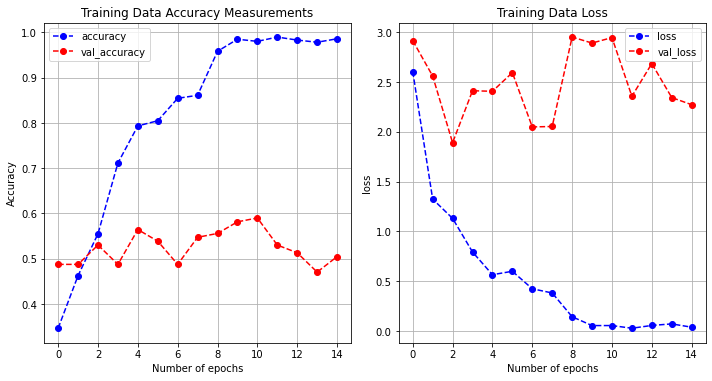

In [25]:
accuracy_loss_plot(history)

In [26]:
X_testloss=model.evaluate(X_test, y_test, verbose=1)

5/5 [==============================] - 7s 1s/step - loss: 2.4606 - accuracy: 0.5154


In [27]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_new = np.argmax(y_test, axis=1)

5/5 [==============================] - 11s 1s/step


In [28]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.19      0.29        16
           1       0.55      0.76      0.64        59
           2       0.41      0.42      0.42        26
           3       0.67      0.40      0.50         5
           4       0.46      0.25      0.32        24

    accuracy                           0.52       130
   macro avg       0.54      0.40      0.43       130
weighted avg       0.52      0.52      0.49       130



<AxesSubplot:>

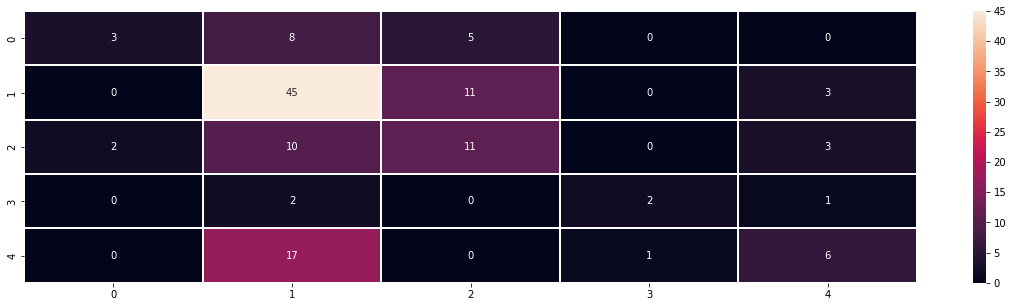

In [29]:
cm=confusion_matrix(y_test_new, y_pred)
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(cm, annot=True, linewidths=2, ax=ax)

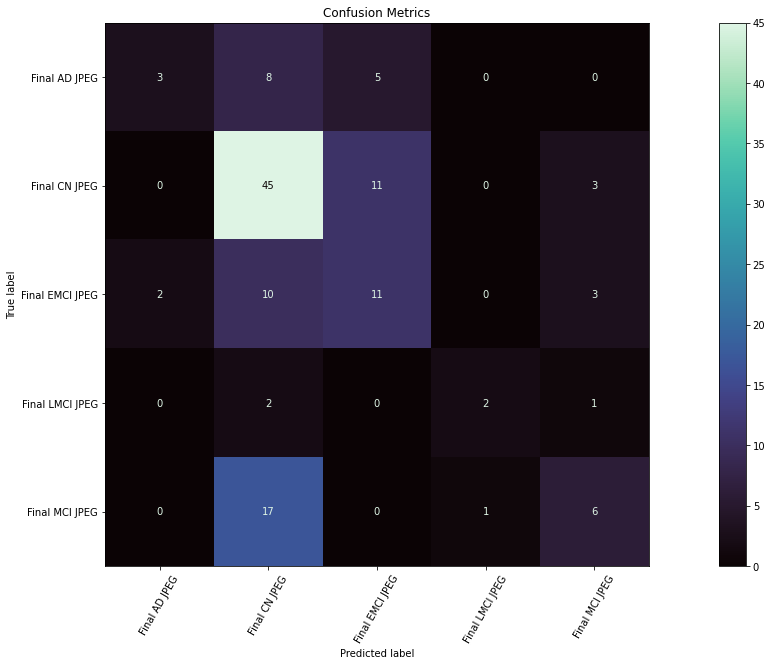

In [30]:
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(25,10)) 
display_c_m.plot(cmap='mako',ax=ax,xticks_rotation=60)
plt.title("Confusion Metrics")
plt.show()

In [31]:
def imagePrediction(upload):
    for name, fileinfo  in uploader.value.items():
        image = Image.open(io.BytesIO(fileinfo['content'])) #Image for PIL and io=input/output locall
    
    images = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    images = cv2.resize(images,(162, 162))
    images = images.reshape(1, 162, 162, 3)
    prd = model.predict(images)
    prd = np.argmax(prd, axis = 1)[0]
    
    if prd==0:
        prd="Final AD JPEG"
    elif prd==1:
        prd="Final CN JPEG"
    elif prd==2:
        prd="Final EMCI JPEG"
    elif prd==3:
        prd="Final LMCI JPEG"
    elif prd==4:
        prd="Final MCI JPEG"
    
    if prd!=1:
        print(f"Model Predict That is a {prd}")
        


# To upload files/images

In [32]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

# Image Predition for Alzheimers

In [33]:
button = widgets.Button(description= "Predict")
out = widgets.Output()

def on_button_click(_):
    with out:
        clear_output()
        try:
            imagePrediction(uploader)
        except:
            print("Please Enter the Correct Image files")
            
            
button.on_click(on_button_click)
widgets.VBox([button, out])